In [1]:
shape_cat=""
vol=""
z_range=""
key=""
quantile=""

In [2]:
# Parameters
shape_cat = "im3"
vol = "all"
z_range = "high_z"
key = "lambda"
quantile = "2"


In [3]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 
%run -i /home/cz136/project/sa/lib/src/func.py  

In [4]:
if quantile!="":
    i=int(quantile)

In [5]:
if key=="lambda":
    key=('All','All','LAMBDA_CHISQ')
elif key=="z":
    key=('All','All','Z_LAMBDA')

In [6]:
def thirds_by_key(catalog,key):
    step0=catalog[key].quantile(0.0)
    step1=catalog[key].quantile(0.333333)
    step2=catalog[key].quantile(0.666666)
    step3=catalog[key].quantile(1)
    
    catalog1=catalog[(catalog[key]>step0) & (catalog[key]<step1)]
    catalog2=catalog[(catalog[key]>step1) & (catalog[key]<step2)]
    catalog3=catalog[(catalog[key]>step2) & (catalog[key]<step3)]
    
    return (catalog1,catalog2,catalog3)

In [7]:
if key!="":
    clusters_list=thirds_by_key(clusters,key)
    clusters=clusters_list[i]

In [8]:
sep="------------------------------------------------------------------------------"
np.set_printoptions(precision=4)

In [9]:
NBINS=10

In [10]:
import treecorr
import astropy.cosmology
from fastprogress import master_bar, progress_bar
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm

In [11]:
if key=="":
    assert np.isin(shapes['All','MEM_MATCH_ID'].to_numpy(),clusters.index.to_numpy()).all()==True

In [12]:
def get_ng(cluster,mode1,mode2):
    if mode2=="abs":
        UPPER_BOUND=np.max(shapes[('All','R')])
        distance=('All','angR')
        
    elif mode2=="rel":
        UPPER_BOUND=1.2
        distance=('All','normLR')
    else:
        raise

    if mode1 == "s":
        def get_cluster_cen(cluster):
            return (get_unique_center_for_cluster(cluster))
        def get_cluster_sats(cluster):
            cen_mat_id=cluster.name
            cen_id=cluster[('Alt','Alt1','ID_CENT')]
            sats=shapes[shapes['All','MEM_MATCH_ID']==cen_mat_id]
            sats=sats[sats.index!=cen_id]
            return (sats)
    elif mode1=='r':
        def get_cluster_sats(cluster):
            return(shapes)
        def get_cluster_cen(cluster):
            return (random)

    else:
        raise


    cen=get_cluster_cen(cluster)
    sats=get_cluster_sats(cluster)


    sats_e1=sats[('All','e1')].to_numpy()
    sats_e2=sats[('All','e2')].to_numpy()
    sats_angr=sats[distance]

#     print(sats_e1,sats_e2)

    if type(cen[('All','RA')])==np.float64:
        cen_angr=np.array(cen[distance]).reshape(1)
        cen_ra=np.array(cen[('All','RA')]).reshape(1)
        cen_dec=np.array(cen[('All','DEC')]).reshape(1)
    else:
#         cen_e1=cen[('All','e1')].to_numpy
#         cen_e2=cen[('All','e2')].to_numpy()
        cen_angr=cen[distance].to_numpy()
        cen_ra=cen[('All','RA')].to_numpy()
        cen_dec=cen[('All','DEC')].to_numpy()




#     print(cen_e1,cen_e2)

    sats_ra=sats[('All','RA')].to_numpy()
    sats_dec=sats[('All','DEC')].to_numpy()




#     print(np.shape(cen_ra),np.shape(cen_dec))    
#     print(cen_ra,cen_dec)    

    sats_cat = treecorr.Catalog( g1 = sats_e1, g2   = sats_e2, 
                                 ra = sats_ra, dec = sats_dec,r=sats_angr,
                                 ra_units='deg', dec_units='deg')

    cen_cat = treecorr.Catalog( 
                                 ra = cen_ra, dec = cen_dec, r=cen_angr,
                                 ra_units='deg', dec_units='deg')

    ng = treecorr.NGCorrelation(nbins=NBINS, min_sep=0.01, max_sep=UPPER_BOUND, bin_slop=0.0,
                               metric="Rperp")
    ng.process_cross(cen_cat,sats_cat)

    return(ng)

In [13]:
def get_xi_meanlogr_varxi_npairs(cluster,mode1,mode2):
    ng=get_ng(cluster,mode1,mode2)
    return(np.array([ng.xi,ng.meanlogr,ng.varxi,ng.npairs]))

In [14]:
length=len(clusters)

def get_ng_list(mode2):
    ng_list=np.empty([length,4,NBINS])
    filler=np.zeros([1,4,NBINS])

    i=0
    e_count=0
    for index,cluster in tqdm(clusters.iterrows()):
        try:
            ng_list[i,:,:]=get_xi_meanlogr_varxi_npairs(cluster,'s',mode2)
            i=i+1
        except ValueError as e:
            ng_list[i,:,:]=filler
            i=i+1
            e_count=e_count+1
    print("Number of empty sat catalogs is {}".format(e_count))
    return (ng_list)

In [15]:
ng_abs=get_ng_list('abs')
ng_rel=get_ng_list('rel')

0it [00:00, ?it/s]

14it [00:00, 139.40it/s]

28it [00:00, 137.87it/s]

45it [00:00, 144.47it/s]

61it [00:00, 148.16it/s]

77it [00:00, 149.81it/s]

93it [00:00, 151.00it/s]

109it [00:00, 153.23it/s]

125it [00:00, 153.12it/s]

141it [00:00, 155.00it/s]

157it [00:01, 156.24it/s]

174it [00:01, 158.08it/s]

190it [00:01, 157.32it/s]

206it [00:01, 156.82it/s]

222it [00:01, 156.84it/s]

238it [00:01, 153.87it/s]

255it [00:01, 156.02it/s]

271it [00:01, 157.00it/s]

288it [00:01, 158.02it/s]

305it [00:01, 159.11it/s]

321it [00:02, 153.30it/s]

337it [00:02, 153.09it/s]

354it [00:02, 156.30it/s]

371it [00:02, 159.51it/s]

388it [00:02, 161.55it/s]

405it [00:02, 162.97it/s]

422it [00:02, 164.04it/s]

439it [00:02, 163.22it/s]

456it [00:02, 164.18it/s]

473it [00:03, 157.13it/s]

489it [00:03, 145.16it/s]

504it [00:03, 145.70it/s]

521it [00:03, 150.58it/s]

538it [00:03, 153.86it/s]

555it [00:03, 156.83it/s]

572it [00:03, 158.41it/s]

589it [00:03, 159.63it/s]

606it [00:03, 158.97it/s]

623it [00:03, 159.43it/s]

640it [00:04, 160.48it/s]

657it [00:04, 160.51it/s]

674it [00:04, 160.32it/s]

691it [00:04, 158.21it/s]

707it [00:04, 156.92it/s]

723it [00:04, 157.38it/s]

739it [00:04, 157.45it/s]

755it [00:04, 156.06it/s]

772it [00:04, 157.48it/s]

788it [00:05, 157.05it/s]

805it [00:05, 158.44it/s]

821it [00:05, 128.58it/s]

837it [00:05, 136.11it/s]

854it [00:05, 142.46it/s]

871it [00:05, 149.10it/s]

887it [00:05, 135.25it/s]

902it [00:05, 124.48it/s]

916it [00:06, 122.64it/s]

932it [00:06, 131.56it/s]

948it [00:06, 138.19it/s]

964it [00:06, 140.74it/s]

980it [00:06, 144.70it/s]

995it [00:06, 140.07it/s]

1012it [00:06, 146.03it/s]

1028it [00:06, 147.95it/s]

1044it [00:06, 151.21it/s]

1061it [00:06, 155.53it/s]

1078it [00:07, 156.73it/s]

1095it [00:07, 158.65it/s]

1112it [00:07, 159.58it/s]

1129it [00:07, 159.84it/s]

1146it [00:07, 155.66it/s]

1162it [00:07, 154.41it/s]

1178it [00:07, 155.36it/s]

1194it [00:07, 155.87it/s]

1211it [00:07, 157.89it/s]

1227it [00:08, 156.85it/s]

1243it [00:08, 151.18it/s]

1260it [00:08, 155.34it/s]

1277it [00:08, 157.11it/s]

1294it [00:08, 158.86it/s]

1311it [00:08, 159.93it/s]

1328it [00:08, 160.92it/s]

1345it [00:08, 161.78it/s]

1363it [00:08, 164.26it/s]

1380it [00:08, 163.51it/s]

1397it [00:09, 163.04it/s]

1414it [00:09, 161.39it/s]

1431it [00:09, 161.40it/s]

1448it [00:09, 162.39it/s]

1465it [00:09, 141.08it/s]

1482it [00:09, 146.92it/s]

1498it [00:09, 150.43it/s]

1514it [00:09, 148.75it/s]

1531it [00:09, 153.87it/s]

1547it [00:10, 132.56it/s]

1563it [00:10, 138.85it/s]

1576it [00:10, 152.58it/s]


0it [00:00, ?it/s]

17it [00:00, 165.12it/s]

Number of empty sat catalogs is 23


34it [00:00, 164.00it/s]

45it [00:00, 140.25it/s]

56it [00:00, 127.49it/s]

67it [00:00, 119.92it/s]

77it [00:00, 111.44it/s]

88it [00:00, 109.30it/s]

103it [00:00, 118.43it/s]

120it [00:00, 129.30it/s]

134it [00:01, 132.10it/s]

151it [00:01, 140.85it/s]

169it [00:01, 148.64it/s]

185it [00:01, 132.84it/s]

199it [00:01, 132.62it/s]

216it [00:01, 141.44it/s]

233it [00:01, 148.77it/s]

251it [00:01, 155.15it/s]

268it [00:01, 159.17it/s]

286it [00:02, 162.22it/s]

303it [00:02, 163.69it/s]

320it [00:02, 138.12it/s]

336it [00:02, 142.44it/s]

354it [00:02, 150.09it/s]

371it [00:02, 155.12it/s]

388it [00:02, 158.56it/s]

405it [00:02, 149.42it/s]

421it [00:02, 152.17it/s]

437it [00:03, 139.48it/s]

452it [00:03, 127.61it/s]

466it [00:03, 120.22it/s]

479it [00:03, 115.95it/s]

493it [00:03, 121.11it/s]

510it [00:03, 130.99it/s]

526it [00:03, 138.10it/s]

541it [00:03, 133.20it/s]

559it [00:03, 142.54it/s]

577it [00:04, 150.35it/s]

595it [00:04, 156.01it/s]

612it [00:04, 159.41it/s]

630it [00:04, 162.17it/s]

648it [00:04, 164.99it/s]

665it [00:04, 148.45it/s]

681it [00:04, 139.33it/s]

696it [00:04, 130.79it/s]

710it [00:05, 127.86it/s]

727it [00:05, 136.47it/s]

744it [00:05, 143.44it/s]

759it [00:05, 130.51it/s]

774it [00:05, 134.81it/s]

792it [00:05, 143.68it/s]

809it [00:05, 150.61it/s]

827it [00:05, 156.36it/s]

844it [00:05, 159.34it/s]

861it [00:06, 161.13it/s]

878it [00:06, 156.68it/s]

894it [00:06, 152.35it/s]

911it [00:06, 155.66it/s]

928it [00:06, 158.60it/s]

945it [00:06, 160.70it/s]

962it [00:06, 162.02it/s]

979it [00:06, 137.81it/s]

994it [00:06, 127.34it/s]

1009it [00:07, 131.90it/s]

1025it [00:07, 139.11it/s]

1042it [00:07, 146.42it/s]

1060it [00:07, 153.15it/s]

1077it [00:07, 157.56it/s]

1094it [00:07, 151.91it/s]

1111it [00:07, 156.28it/s]

1127it [00:07, 133.74it/s]

1143it [00:07, 139.02it/s]

1161it [00:08, 147.24it/s]

1178it [00:08, 152.79it/s]

1196it [00:08, 157.53it/s]

1213it [00:08, 159.07it/s]

1230it [00:08, 153.88it/s]

1248it [00:08, 158.43it/s]

1265it [00:08, 159.54it/s]

1282it [00:08, 161.33it/s]

1299it [00:08, 161.57it/s]

1316it [00:09, 163.20it/s]

1333it [00:09, 144.95it/s]

1348it [00:09, 138.33it/s]

1366it [00:09, 147.88it/s]

1383it [00:09, 153.74it/s]

1401it [00:09, 159.52it/s]

1419it [00:09, 162.79it/s]

1436it [00:09, 147.67it/s]

1454it [00:09, 154.05it/s]

1470it [00:10, 153.87it/s]

1487it [00:10, 155.83it/s]

1503it [00:10, 152.09it/s]

1519it [00:10, 154.12it/s]

1535it [00:10, 137.56it/s]

1552it [00:10, 144.70it/s]

1569it [00:10, 149.47it/s]

1576it [00:10, 146.71it/s]

Number of empty sat catalogs is 23


In [16]:
try:
    ng_r=get_xi_meanlogr_varxi_npairs(clusters,'r','abs')
except ValueError as e:
    print(e)
    ng_r=np.array([[1],[1],[1],[1]])

In [17]:
# ng_list=np.load("/home/cz136/project/sa/data/{}/ng_list_cross.npy".format(dir_string))
# ng_r=np.load("/home/cz136/project/sa/data/{}/ng_r_list_cross.npy".format(dir_string))

In [18]:
def get_sum(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross,sum_meanlogr,sum_npairs)

def get_mean(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross/sum_npairs,sum_meanlogr/sum_npairs)

In [19]:
def get_sigma(ng_list):
    xi_array=ng_list[:,0,:]
    npairs_array=ng_list[:,3,:]
    
    N=len(xi_array)
    
    jk_xi_array=np.empty([N,NBINS])
    
    def get_xi(drop_1_xi,drop_1_npairs):
        return(np.sum(drop_1_xi,axis=0)/np.sum(drop_1_npairs,axis=0))
    
    for i in range(N):
        drop_1_xi=np.delete(xi_array,i,axis=0)
        drop_1_npairs=np.delete(npairs_array,i,axis=0)
        jk_xi_array[i,:]=get_xi(drop_1_xi,drop_1_npairs)
        
    return(np.sqrt(N)*np.std(jk_xi_array,axis=0))

In [20]:
sum_abs=get_sum(ng_abs)
mean_abs=get_mean(ng_abs)
sig_abs=get_sigma(ng_abs)

sum_rel=get_sum(ng_rel)
mean_rel=get_mean(ng_rel)
sig_rel=get_sigma(ng_rel)

/home/cz136/project/sa/lib/src/func.py:11: RuntimeWarning: invalid value encountered in true_divide
  raise TypeError
/home/cz136/project/sa/lib/src/func.py:10: RuntimeWarning: invalid value encountered in true_divide
  else:


In [21]:
r_xi=ng_r[0]/ng_r[3]
r_meanlogr=ng_r[1]/ng_r[3]
r_sigma=r_xi/np.sqrt(len(clusters))

In [22]:
if key!="":
    np.savez("/home/cz136/project/sa/data/2pt/{}_{}_{}_{}.npz".format(shape_cat,vol,key,quantile),sum_abs=sum_abs,mean_abs=mean_abs,sig_abs=sig_abs,sum_rel=sum_rel,mean_rel=mean_rel,sig_rel=sig_rel,r_xi=r_xi,r_meanlogr=r_meanlogr,r_sigma=r_sigma)

In [23]:
def plt_w_error(meanlogr,xi,varxi,title):
    fig,ax=plt.subplots()
    ax.errorbar(np.exp(meanlogr),xi,yerr=varxi)
    ax.set_title(title)
    ax.set_xscale('log')
#     ax.set_ylim(-0.020,0.020)
    plt.show()
    
    if title==r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA":
        plt.savefig("/home/cz136/project/sa/image/rel_{}_{}_{}.png".format(shape_cat,vol,z_range))
#     plt.xscale('log')
#     plt.yscale('log')

# Statistics

In [24]:
def print_data(sum_,mean_):
    sum_string=["Aggregated xi:", "Aggregated meanlogr:","Aggregated npairs:"]
    for i,data in enumerate(sum_):
        print(sum_string[i])
        print(sum_[i])
        print(sep)
    mean_string=["Mean xi:", "Mean meanlogr:","Mean npairs:"]
    for i,data in enumerate(mean_):
        print(mean_string[i])
        print(mean_[i])
        print(sep)

# Abs Plots

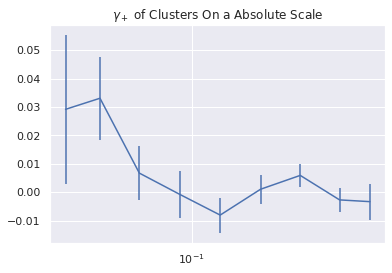

Aggregated xi:
[  0.      -2.7717  -9.5581  -3.7573   0.744   13.1471  -2.6354 -20.5413
  10.5564   4.7843]
------------------------------------------------------------------------------
Aggregated meanlogr:
[    0.      -360.5957  -979.1802 -1630.8177 -2310.3197 -3214.4446
 -3737.8224 -3533.3576 -2165.7855  -280.9203]
------------------------------------------------------------------------------
Aggregated npairs:
[   0.   95.  289.  558.  946. 1635. 2511. 3468. 3914. 1444.]
------------------------------------------------------------------------------
Mean xi:
[    nan -0.0292 -0.0331 -0.0067  0.0008  0.008  -0.001  -0.0059  0.0027
  0.0033]
------------------------------------------------------------------------------
Mean meanlogr:
[    nan -3.7957 -3.3882 -2.9226 -2.4422 -1.966  -1.4886 -1.0188 -0.5533
 -0.1945]
------------------------------------------------------------------------------


In [25]:
plt_w_error(mean_abs[1],-mean_abs[0],sig_abs,r"$\gamma_+$ of Clusters On a Absolute Scale ")
print_data(sum_abs,mean_abs)

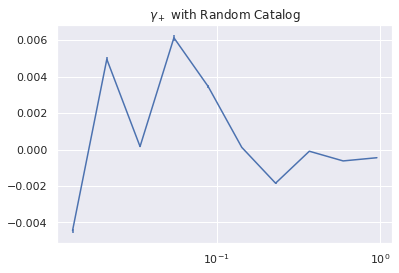

[-4.4456e-03  4.9577e-03  1.6617e-04  6.1347e-03  3.4647e-03  1.2124e-04
 -1.8462e-03 -9.1859e-05 -6.2345e-04 -4.4764e-04]
[ 1.1198e-04 -1.2488e-04 -4.1857e-06 -1.5453e-04 -8.7274e-05 -3.0541e-06
  4.6504e-05  2.3139e-06  1.5704e-05  1.1276e-05]


In [26]:
plt_w_error(r_meanlogr,-r_xi,r_sigma,r"$\gamma_+$ with Random Catalog")
print(-r_xi)
print(r_sigma)

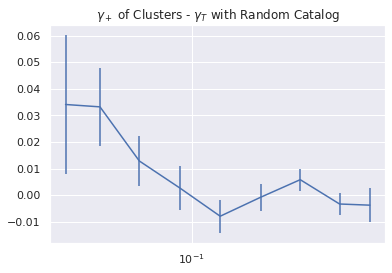

In [27]:
plt_w_error(mean_abs[1],-(mean_abs[0]+r_xi),np.hypot(r_sigma,sig_abs),r"$\gamma_+$ of Clusters - $\gamma_T$ with Random Catalog")

# Rel plots

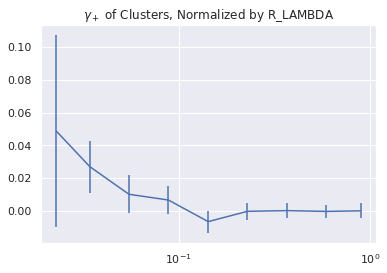

Aggregated xi:
[ 0.     -1.3164 -6.2015 -4.6696 -5.223   8.536   0.1551 -1.1502  0.4989
 -0.6613]
------------------------------------------------------------------------------
Aggregated meanlogr:
[    0.      -101.83    -771.4677 -1313.3313 -1862.4935 -2627.1678
 -3176.7248 -3189.3546 -2078.5959  -326.7734]
------------------------------------------------------------------------------
Aggregated npairs:
[   0.   27.  229.  453.  768. 1349. 2150. 3182. 3919. 2783.]
------------------------------------------------------------------------------
Mean xi:
[        nan -4.8756e-02 -2.7081e-02 -1.0308e-02 -6.8008e-03  6.3277e-03
  7.2152e-05 -3.6146e-04  1.2730e-04 -2.3761e-04]
------------------------------------------------------------------------------
Mean meanlogr:
[    nan -3.7715 -3.3689 -2.8992 -2.4251 -1.9475 -1.4775 -1.0023 -0.5304
 -0.1174]
------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [28]:
plt_w_error(mean_rel[1],-mean_rel[0],sig_rel,r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA")
print_data(sum_rel,mean_rel)